<a href="https://colab.research.google.com/github/RuvindiDilsara/ML_Feature_Engineering/blob/main/Label_1_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

In [3]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [4]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/Feature_Engineering"

In [5]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [6]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [7]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


# Dataset Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}

for target_label in LABELS:
  tr_df = train[train['label_2'].notna()] if target_label == 'label_2' else train
  vl_df = valid
  test_df = test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(tr_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = tr_df[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(vl_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = vl_df[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_df[target_label]

In [9]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train[L1], y_train[L1])

SVC(kernel='linear')

In [10]:
from sklearn import metrics

y_pred = clf.predict(x_valid[L1])
y_pred_test = clf.predict(x_test[L1])

In [11]:
print (metrics.confusion_matrix(y_valid[L1], y_pred))
print (metrics.accuracy_score(y_valid[L1], y_pred))
print (metrics.precision_score(y_valid[L1], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L1], y_pred, average="weighted"))

[[13  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
0.9906666666666667
0.9914608132608133
0.9906666666666667


# Feature Engineering

### SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=100)
X_new = selector.fit_transform(x_train[L1], y_train[L1])
print("Shape: ", X_new.shape)

Shape:  (28520, 100)


In [13]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_new, y_train[L1])

SVC(kernel='linear')

In [14]:
y_pred = clf.predict(selector.transform(x_valid[L1]))
print (metrics.confusion_matrix(y_valid[L1], y_pred))
print (metrics.accuracy_score(y_valid[L1], y_pred))
print (metrics.precision_score(y_valid[L1], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L1], y_pred, average="weighted"))

[[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  1]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  9]]
0.976
0.9774185666185666
0.976


### PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train[L1])
x_train_trf = pd.DataFrame(pca.transform(x_train[L1]))
x_valid_trf = pd.DataFrame(pca.transform(x_valid[L1]))

print("Shape after PCA: ", x_train_trf.shape)

Shape after PCA:  (28520, 67)


In [16]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_trf, y_train[L1])

SVC(kernel='linear')

In [17]:
y_pred = clf.predict(x_valid_trf)
print (metrics.confusion_matrix(y_valid[L1], y_pred))
print (metrics.accuracy_score(y_valid[L1], y_pred))
print (metrics.precision_score(y_valid[L1], y_pred, average="weighted"))
print (metrics.recall_score(y_valid[L1], y_pred, average="weighted"))

[[12  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
0.9813333333333333
0.9835733337182255
0.9813333333333333


### SelectKBest with PCA

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
new_selector = SelectKBest(f_classif, k=130)
x_train_sb = new_selector.fit_transform(x_train[L1], y_train[L1])
x_valid_sb = new_selector.transform(x_valid[L1])
x_test_sb = new_selector.transform(x_test[L1])
print("Shape: ", x_train_sb.shape)

Shape:  (28520, 130)


In [19]:
from sklearn.decomposition import PCA
new_pca = PCA(n_components=0.95, svd_solver='full')
new_pca.fit(x_train_sb)
x_train_pca = pd.DataFrame(new_pca.transform(x_train_sb))
x_valid_pca = pd.DataFrame(new_pca.transform(x_valid_sb))
x_test_pca = pd.DataFrame(new_pca.transform(x_test_sb))
print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28520, 54)


In [20]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_pca, y_train[L1])

SVC(kernel='linear')

In [21]:
y_pred_sb_pca = clf.predict(x_valid_pca)
y_pred_sb_pca_test = clf.predict(x_test_pca)
print ("Predicted labels after feature engineering:", y_pred_sb_pca_test)
print (metrics.confusion_matrix(y_valid[L1], y_pred_sb_pca))
print (metrics.accuracy_score(y_valid[L1], y_pred_sb_pca))
print (metrics.precision_score(y_valid[L1], y_pred_sb_pca, average="weighted"))
print (metrics.recall_score(y_valid[L1], y_pred_sb_pca, average="weighted"))

Predicted labels after feature engineering: [45 45 45 45 45 30  5  5  5  5 16  5  5  5  5  5  5  5 60 60 60 60 60 60
 60 60 19 19 19 19 19 19 19 19 19 19 39 19 19 19 19 19 11 11 11 11 11 11
 11 11 11 11 11 11 52 36 52 52 52 52 52 52 52 52 52 25 25 25 25 25 25 25
 25 25 25 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 51
 40 51 51 51 51 51 51 51 51 51 51 29 51 51 51 51 35 35 35 35 35 35 35 35
 56 56 56 56 56 56 56 56 56 56 56 53 53 53 53 53 53 29 53 53 53  3  3  3
  3  3  3  3  3  3  3 40 40 40 40 40 40 40 20 40 40 40 40 40 40 40 43 43
 43 43 43 43 43 43 43 43 43 36 58 58 58 58 58 58 58 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37 37
 55 55 55 55 55 55 55 55 55 55 55  7 55 55 55 55 55 17  2 17 24 39 21 17
 17 17 17 17 17 17  2  2 19  2  2  2  2  2  2  2  2  2 47 47 47 47 47 47
 47 47 47 26 47 47 47 54 54 54 54 54 54 46 54 46 54 54 21 21 21 21 21 21
 21 21 21 21 21 21 34 34 34 34 34 34 34 34 34 23 23 21 23 23 23 23 23 23
 23 23 

In [22]:
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test,
    'Predicted labels after feature engineering': y_pred_sb_pca_test,
    'No of new features': x_test_pca.shape[1]
})


for i in range(256):
  if i < x_test_pca.shape[1]:
    output_df[f'new_feature_{i+1}'] = x_test_pca.iloc[:, i]
  else:
    output_df[f'new_feature_{i+1}'] = None

<ipython-input-22-dee4ba55c33c>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-22-dee4ba55c33c>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output_df[f'new_feature_{i+1}'] = None
<ipython-input-22-dee4ba55c33c>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newf

In [23]:
output_df.shape

(750, 259)

In [24]:
test.shape

(750, 260)

In [25]:
output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,45,45,54,4.902662,-2.059416,-0.188623,0.902723,3.945137,1.013698,-1.076553,...,None,None,None,None,None,None,None,None,None,None
1,45,45,54,9.333768,-5.193131,-0.818696,2.776954,8.320530,0.982780,1.021712,...,None,None,None,None,None,None,None,None,None,None
2,45,45,54,4.658373,-2.883862,1.806987,1.420094,4.600987,0.304708,-1.392170,...,None,None,None,None,None,None,None,None,None,None
3,45,45,54,6.248552,-1.587215,-2.162162,0.351600,0.612319,0.982447,1.153166,...,None,None,None,None,None,None,None,None,None,None
4,45,45,54,4.866629,-0.022779,-2.058680,3.242445,3.256074,0.016608,0.065912,...,None,None,None,None,None,None,None,None,None,None


In [26]:

# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190140L_label_1.csv", index=False)

### Co-relation matrix


In [27]:
corr_matrix = x_train_pca.corr()
corr_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.000000e+00,3.687549e-16,-1.360532e-16,3.541610e-16,-4.153026e-16,3.286783e-16,-3.391622e-16,2.088956e-16,-6.053245e-16,-4.838427e-16,...,-1.708573e-16,5.831168e-16,-1.271673e-16,4.583316e-16,2.666362e-16,1.510106e-17,2.836978e-16,-8.020370e-16,3.584001e-16,1.090358e-16
1,3.687549e-16,1.000000e+00,4.825831e-16,4.301219e-16,2.289205e-16,3.202543e-16,3.079608e-16,1.977953e-16,4.056181e-16,8.370067e-17,...,1.817868e-16,-3.405179e-16,5.597012e-17,-1.091111e-16,-2.018782e-16,4.322641e-16,-1.766590e-16,-2.600369e-16,-1.469596e-16,-1.414523e-16
2,-1.360532e-16,4.825831e-16,1.000000e+00,-1.458784e-15,2.622907e-17,-3.314042e-16,-6.543692e-16,-4.653103e-16,-6.504089e-16,-4.287440e-16,...,-7.168955e-16,2.753401e-16,5.157471e-16,-5.619156e-16,-4.146658e-17,-2.849036e-16,2.153152e-16,-2.169977e-16,1.400039e-16,-3.447076e-16
3,3.541610e-16,4.301219e-16,-1.458784e-15,1.000000e+00,-4.897754e-16,5.268602e-16,2.715322e-16,-2.645244e-16,3.699695e-16,6.808433e-17,...,-3.945099e-16,-2.863874e-16,5.986243e-17,-3.652067e-16,-8.370352e-17,2.386179e-16,-8.934372e-17,-2.070007e-16,3.347819e-17,1.505711e-16
4,-4.153026e-16,2.289205e-16,2.622907e-17,-4.897754e-16,1.000000e+00,2.143005e-17,4.249944e-16,3.092214e-16,-8.882362e-17,-2.155062e-16,...,-9.996532e-17,-5.730345e-16,4.287316e-17,3.826625e-16,2.462212e-16,7.714215e-17,1.072362e-16,1.347866e-16,-7.090161e-17,3.428618e-16


<Axes: >

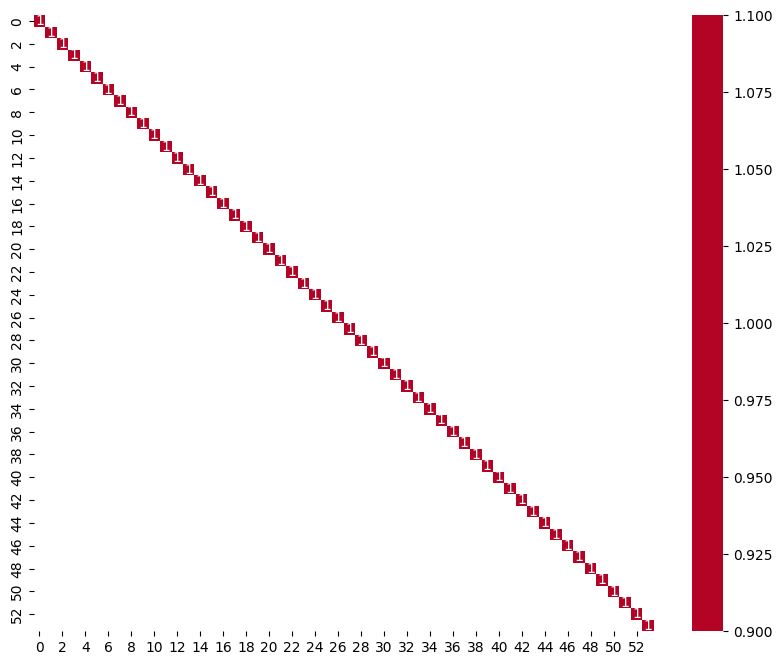

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)